In [4]:
#!pip install pandas-profiling

In [14]:
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [30]:
print(np.__version__)

2.0.2


In [17]:
run = wandb.init(
    project="end_to_end",
    save_code=True
)


artifact = run.use_artifact('housing_dataset:latest')
artifact_dir = artifact.download()
csv_path = f"{artifact_dir}/housing.csv"
df = pd.read_csv(csv_path)
print(df.head())

wandb:   2 of 2 files downloaded.  


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [18]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


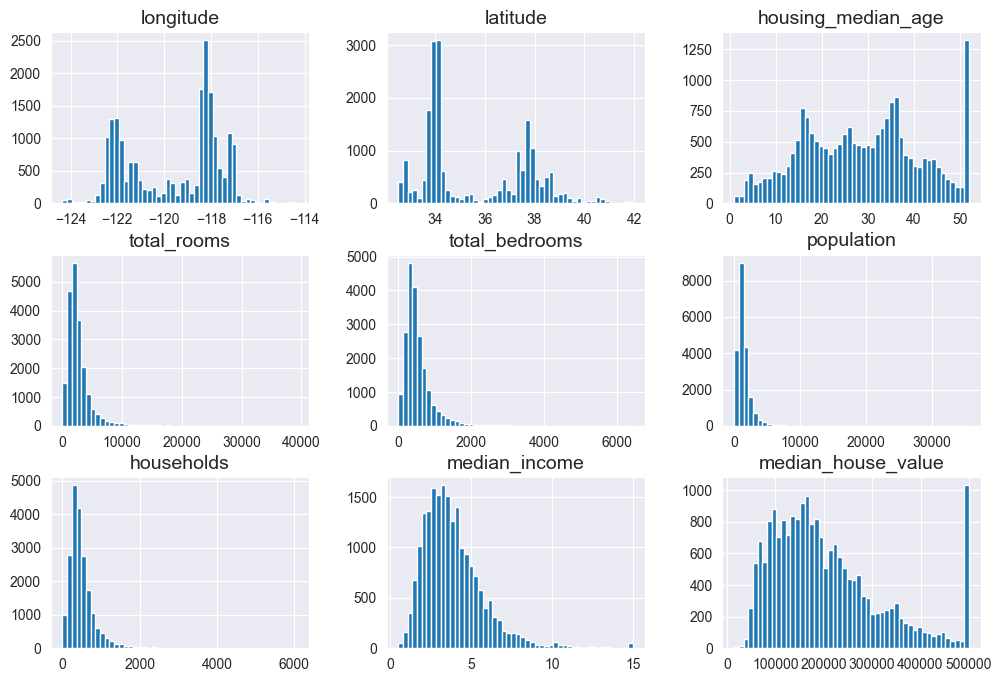

In [24]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
wandb.log({"data_histogram": wandb.Image(plt, caption="Data Distribution Histogram")})

plt.show()

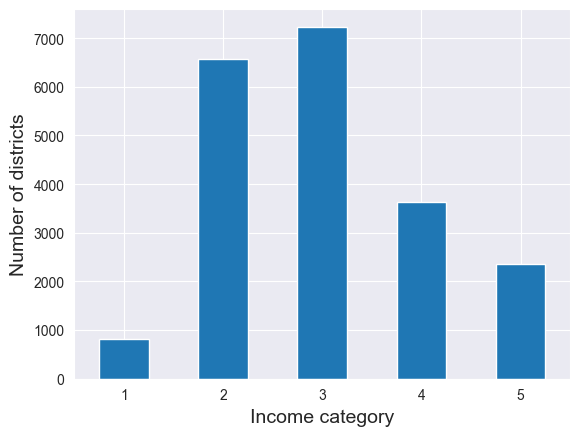

In [25]:

df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

df["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
wandb.log({"Income Distribution": wandb.Image(plt, caption="Data Distribution Histogram to stratify")})
plt.show()


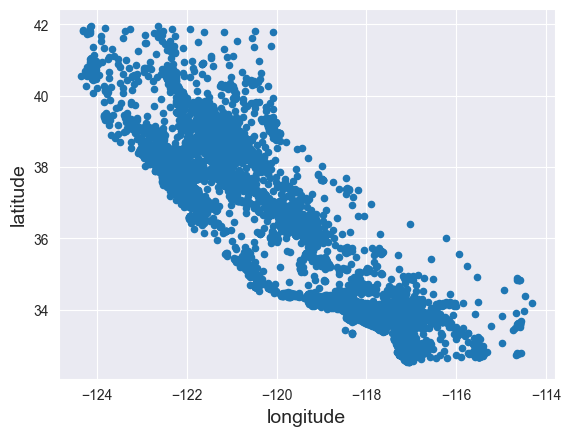

In [26]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True)
wandb.log({"Geographical Data": wandb.Image(plt, caption="Geographical Data visualization")})
plt.show()

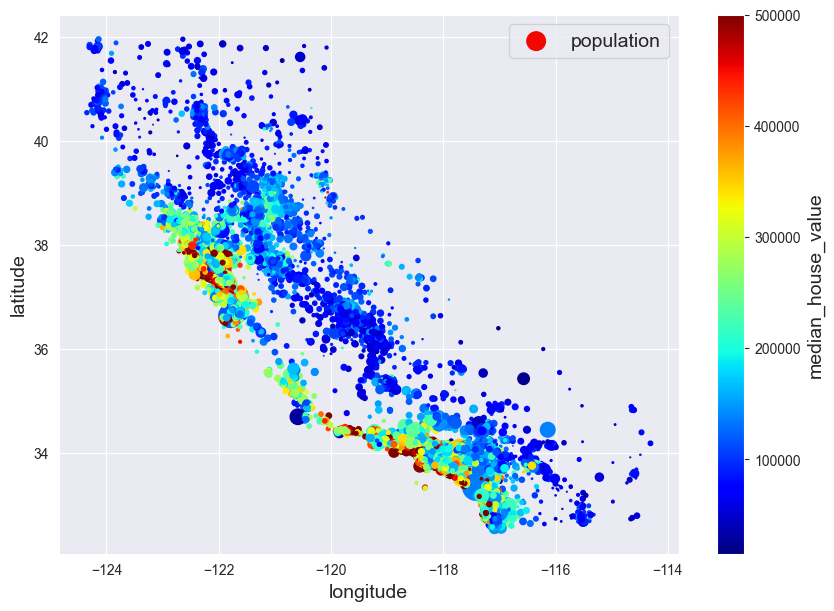

In [27]:

df.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=df["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
wandb.log({"Geographical Data with filters": wandb.Image(plt, caption="Geographical Data visualization")})
plt.show()

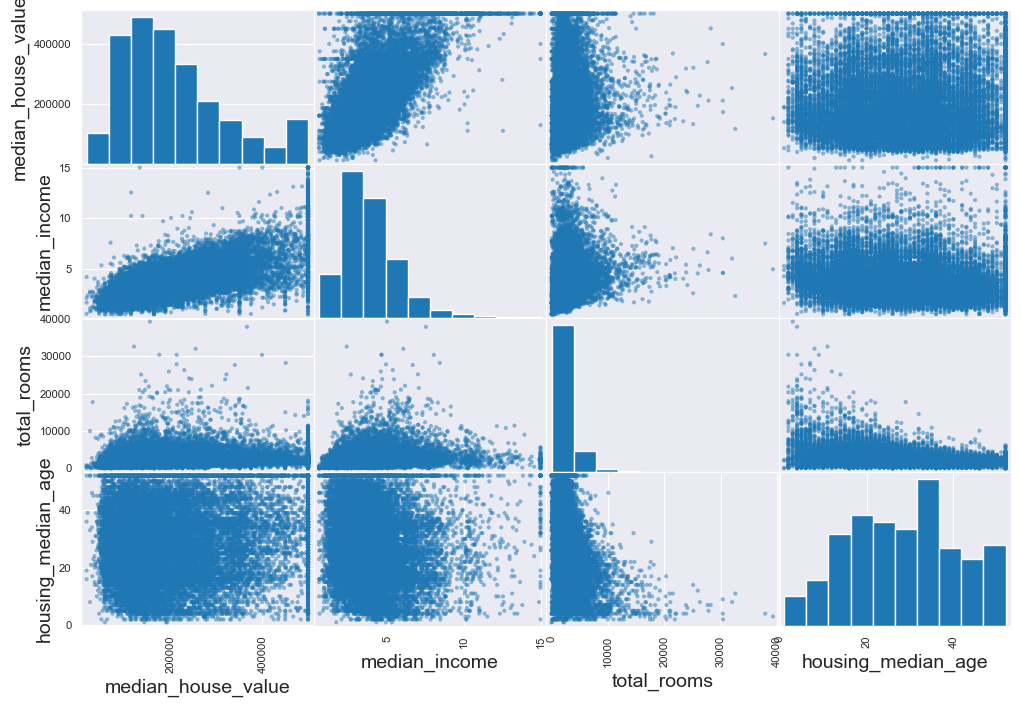

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))
wandb.log({"Correlation Variables": wandb.Image(plt, caption="Correlation Variables visualization")})
plt.show()

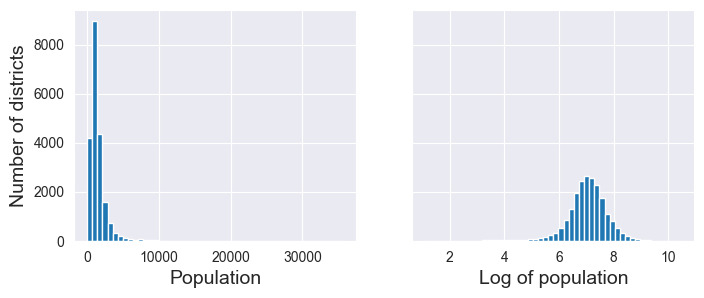

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df["population"].hist(ax=axs[0], bins=50)
df["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
wandb.log({"Normalization Variables": wandb.Image(plt, caption="Normalization Variables")})
plt.show()

In [31]:
df.isnull().sum().sort_values(ascending=False)

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
income_cat              0
dtype: int64